In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from terminal_optimization import hydrogen_objects
from terminal_optimization import hydrogen_defaults
from terminal_optimization import hydrogen_system

# 0. Prepare inputs

In [2]:
startyear = 2019
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2023:
        demand.append(1_000_000)
    else:
        demand.append(5_000_000)

scenario_data={'year': years, 'volume': demand}

# instantiate a commodity objects
lhydrogen = hydrogen_objects.Commodity(**hydrogen_defaults.commodity_lhydrogen_data)
lhydrogen.scenario_data = pd.DataFrame(data=scenario_data)

# Ammonia
hydrogen_defaults.commodity_ammonia_data['historic_data'] = []
hydrogen_defaults.commodity_ammonia_data['scenario_data'] = []
ammonia = hydrogen_objects.Commodity(**hydrogen_defaults.commodity_ammonia_data)

# MCH
hydrogen_defaults.commodity_MCH_data['historic_data'] = []
hydrogen_defaults.commodity_MCH_data['scenario_data'] = []
MCH = hydrogen_objects.Commodity(**hydrogen_defaults.commodity_MCH_data)

# combine
demand = [lhydrogen, ammonia, MCH]

# plot scenarios 
if False:
    lhydrogen.plot_demand()
    ammonia.plot_demand()
    MCH.plot_demand()

## 0.2 Generate vessels

In [4]:
# instantiate vessels
Smallhydrogen = hydrogen_objects.Vessel(**hydrogen_defaults.smallhydrogen_data)
Largehydrogen = hydrogen_objects.Vessel(**hydrogen_defaults.largehydrogen_data)
Smallammonia = hydrogen_objects.Vessel(**hydrogen_defaults.smallammonia_data)
Largeammonia = hydrogen_objects.Vessel(**hydrogen_defaults.largeammonia_data)
Handysize = hydrogen_objects.Vessel(**hydrogen_defaults.handysize_data)
Panamax = hydrogen_objects.Vessel(**hydrogen_defaults.panamax_data)
VLCC = hydrogen_objects.Vessel(**hydrogen_defaults.vlcc_data)


vessels = [Smallhydrogen, Largehydrogen, Smallammonia, Largeammonia, Handysize, Panamax, VLCC] 

# 1. Instatiate terminal system

In [5]:
Terminal = hydrogen_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 5840,   # example Wijnand
                         debug=True,
                         storage_type_defaults=hydrogen_defaults.storage_lh2_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [6]:
Terminal.simulate()


Simulate year: 2018
  Total vessel calls: 0
     Small Hydrogen  calls: 0
     Large Hydrogen calls: 0
     Small ammonia calls: 0
     Large ammonia calls: 0
     Handysize calls: 0
     Panamax calls: 0
     VLCC calls: 0
  Total cargo volume: 0.0
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Unloading occupancy planned (@ start of year): inf
     Unloading occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): nan
     throughput online 0
     throughput planned 0
  *** add Berth to elements
  

/Users/emmazomer/Documents/ANACONDA/Terminal-Optimization/src/terminal_optimization/hydrogen_system.py:1178: RuntimeWarning: invalid value encountered in double_scalars
  waiting_time_occupancy = waiting_time_hours * total_calls / self.operational_hours



     Berth occupancy online (@ start of year): 0.12688356164383563
     Unloading occupancy planned (@ start of year): 0.0976027397260274
     Unloading occupancy online (@ start of year): 0.0976027397260274
     waiting time factor (@ start of year): 0
     waiting time occupancy (@ start of year): 0.0
     throughput online 1042857.1428571427
     throughput planned 1042857.1428571427
     a total of 4000 ton of pipeline_jetty service capacity is online; 4000 ton total planned
     a total of 44000 ton of HydrogenTank storage capacity is online; 44000 ton total planned
  *** add storage to elements
     a total of 44000 ton of HydrogenTank storage capacity is online; 48000 ton total planned
  *** add storage to elements
     a total of 44000 ton of HydrogenTank storage capacity is online; 52000 ton total planned
  *** add storage to elements
     a total of 44000 ton of HydrogenTank storage capacity is online; 56000 ton total planned
  *** add storage to elements
     a total of 440

     Revenues: 0
     Revenues: 0
     Revenues: 1000000000
     Revenues: 1000000000
     Revenues: 1000000000
     Revenues: 1042857142
     Revenues: 2190000000
     Revenues: 5000000000
     Revenues: 5000000000
     Revenues: 5000000000
PV: [-1.29700800e+08 -4.93069902e+09 -1.22330926e+09 -9.57679076e+08
 -7.23785098e+08 -3.98504963e+09 -7.52178313e+09 -2.08088862e+09
 -1.22001575e+09  6.32892339e+09]
NPV: -16443986982.636042


## Report all elements

In [7]:
if False: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

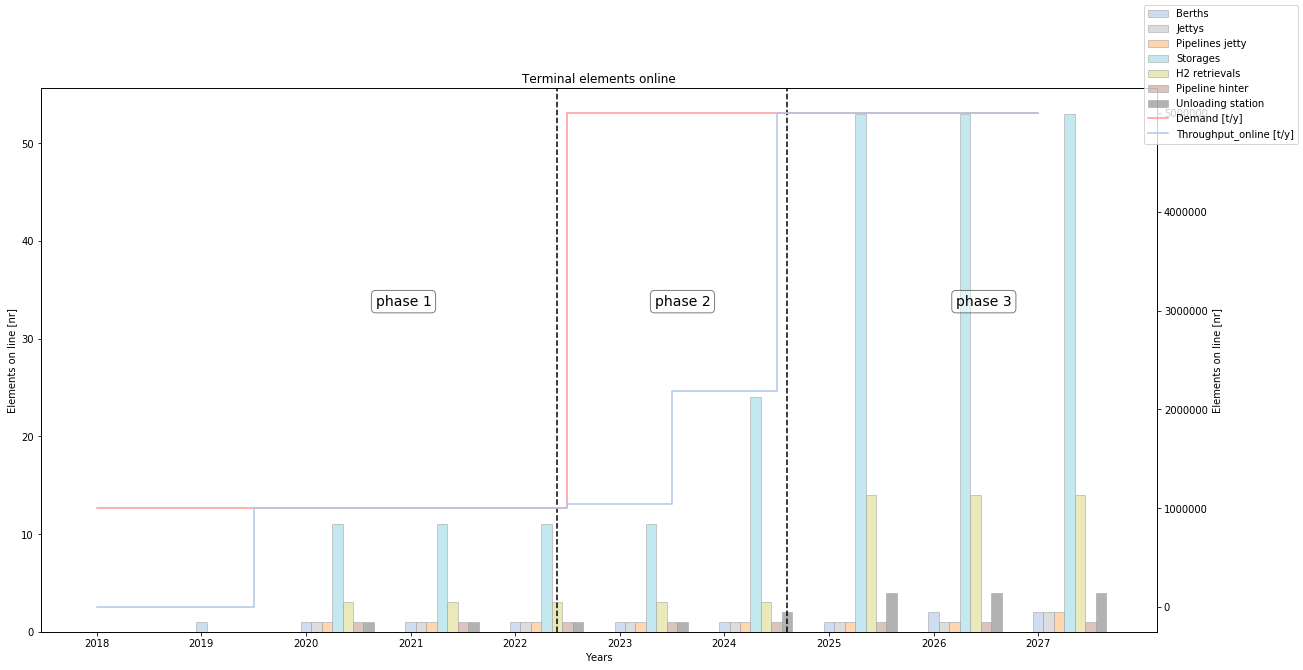

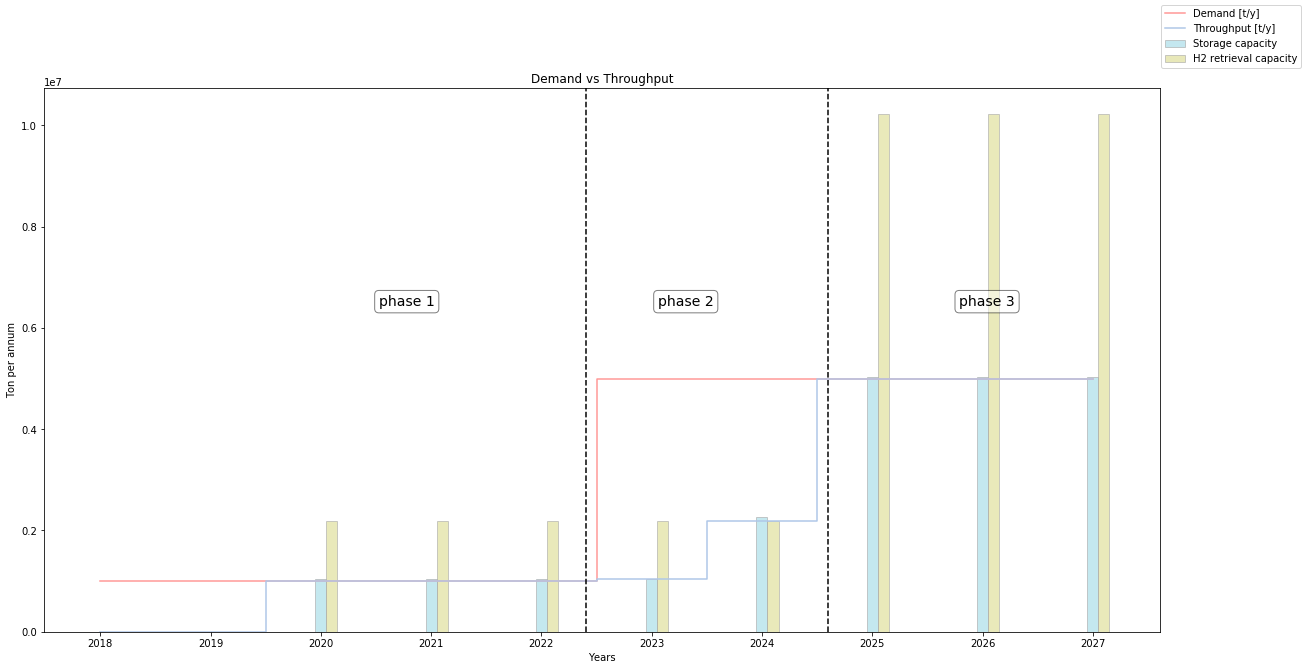

In [8]:
Terminal.terminal_elements_plot()
Terminal.demand_terminal_plot()

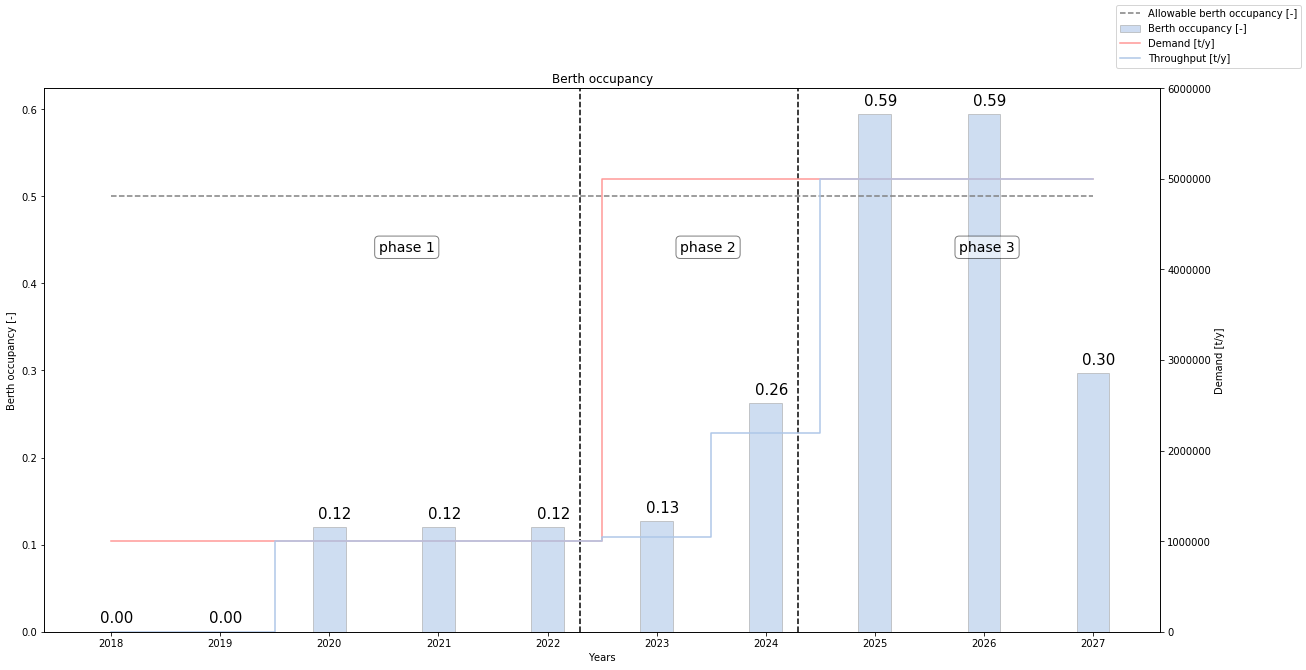

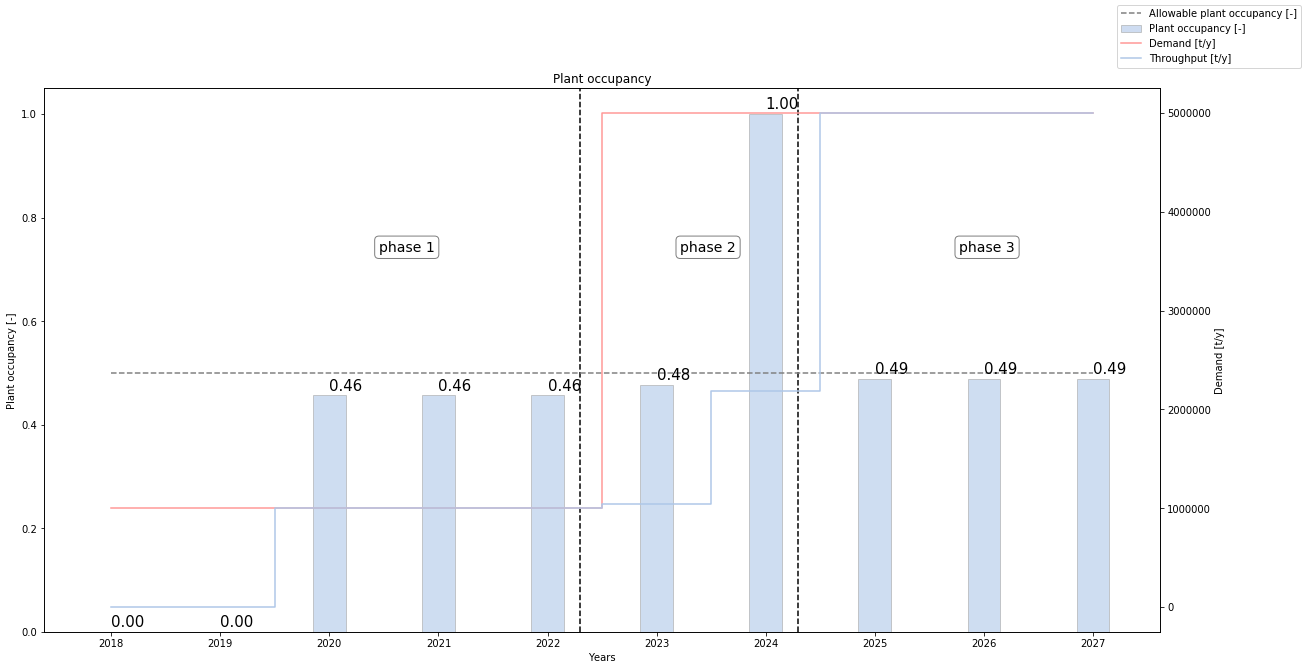

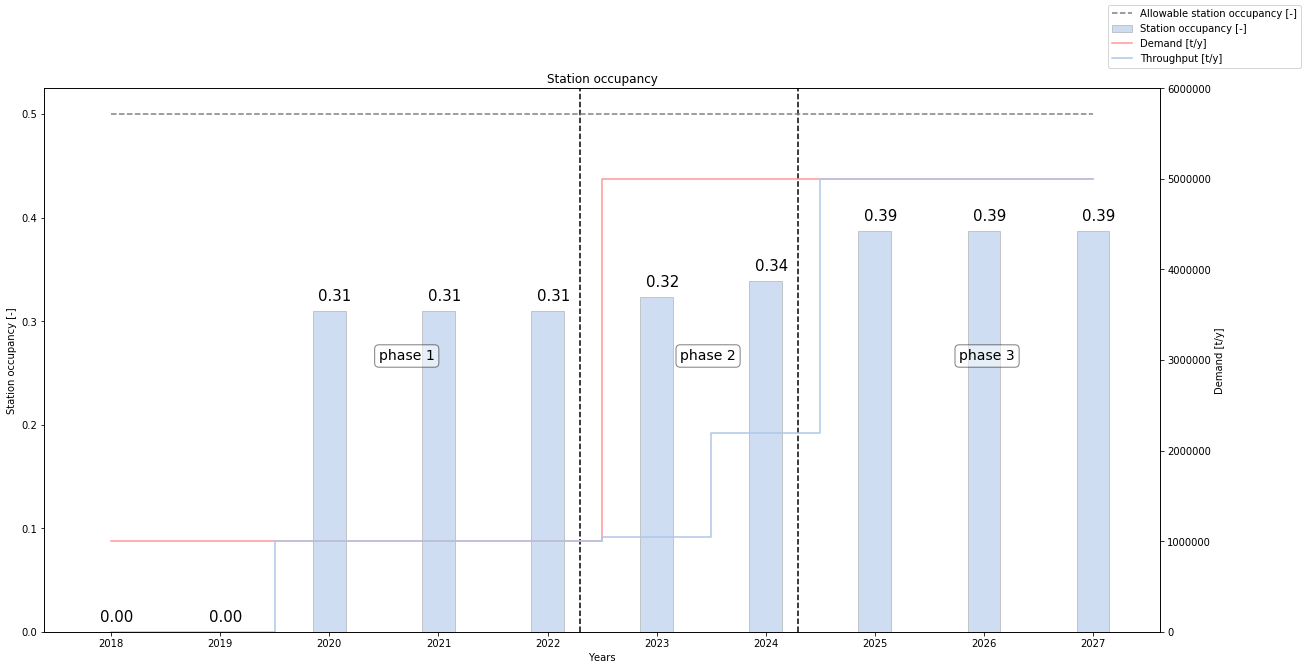

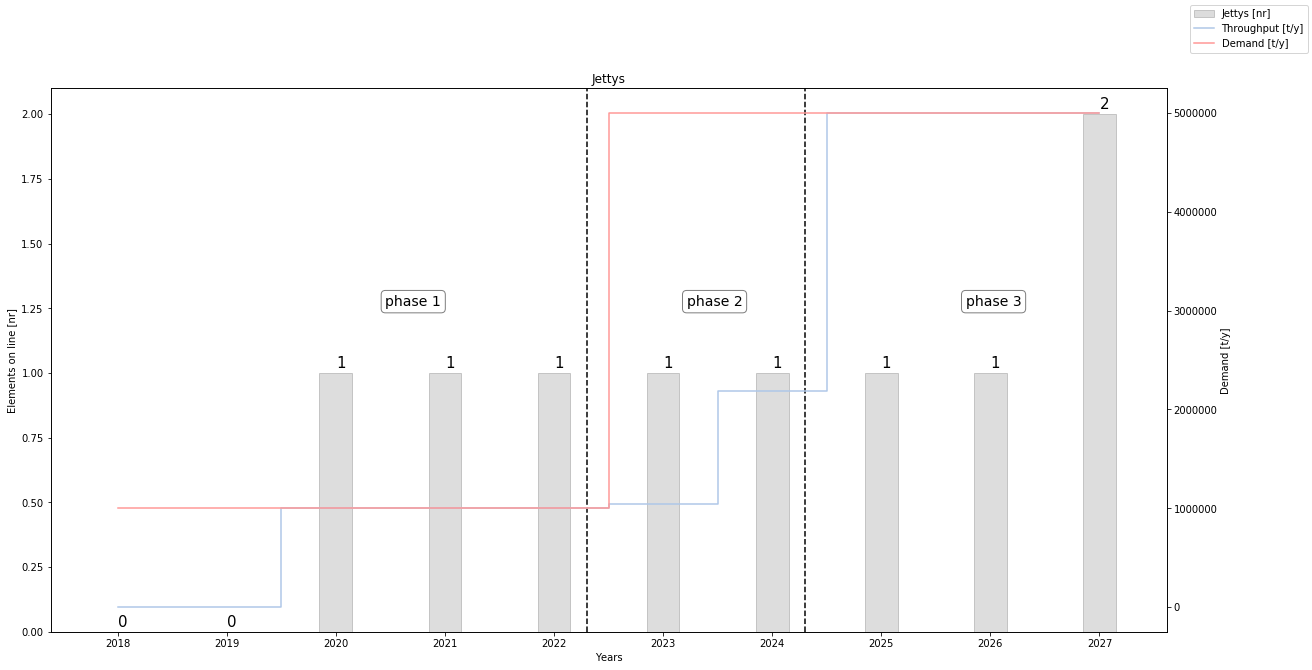

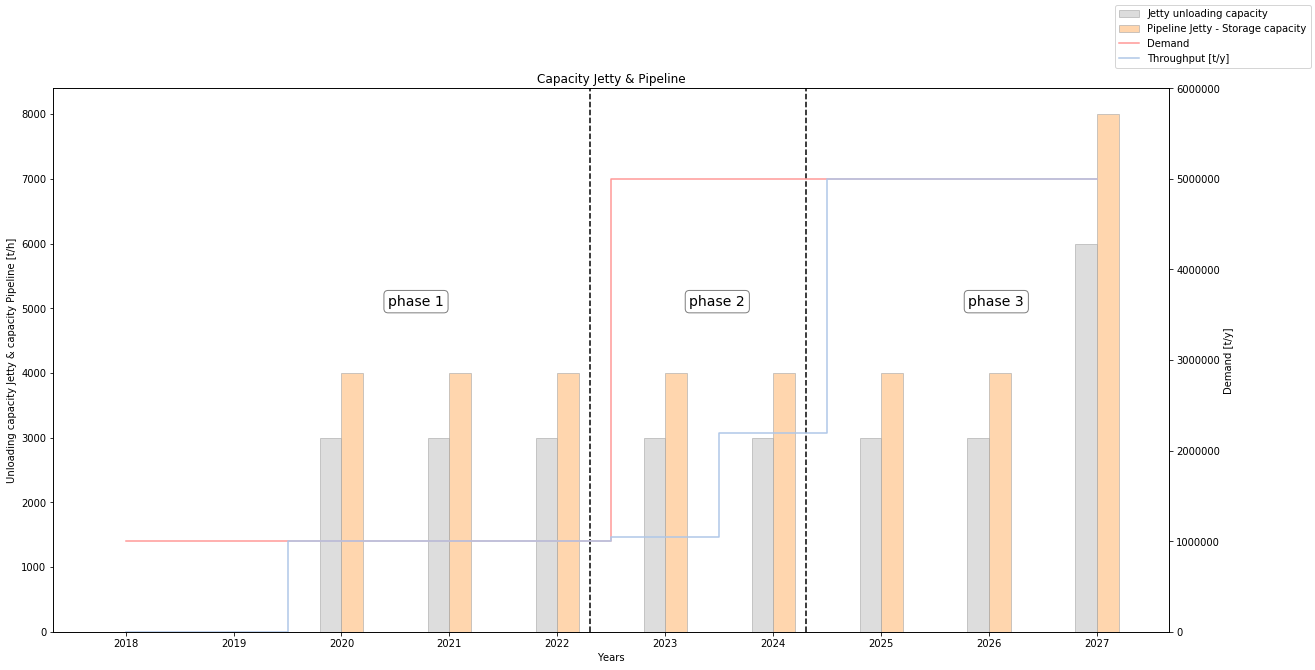

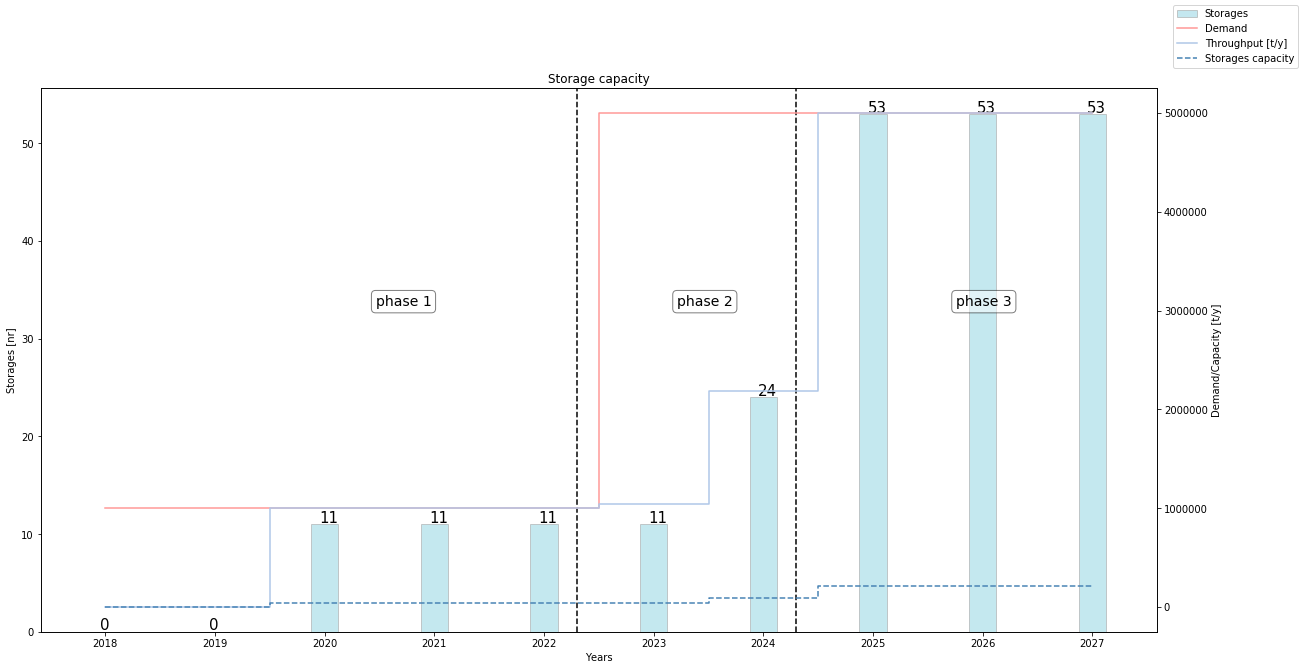

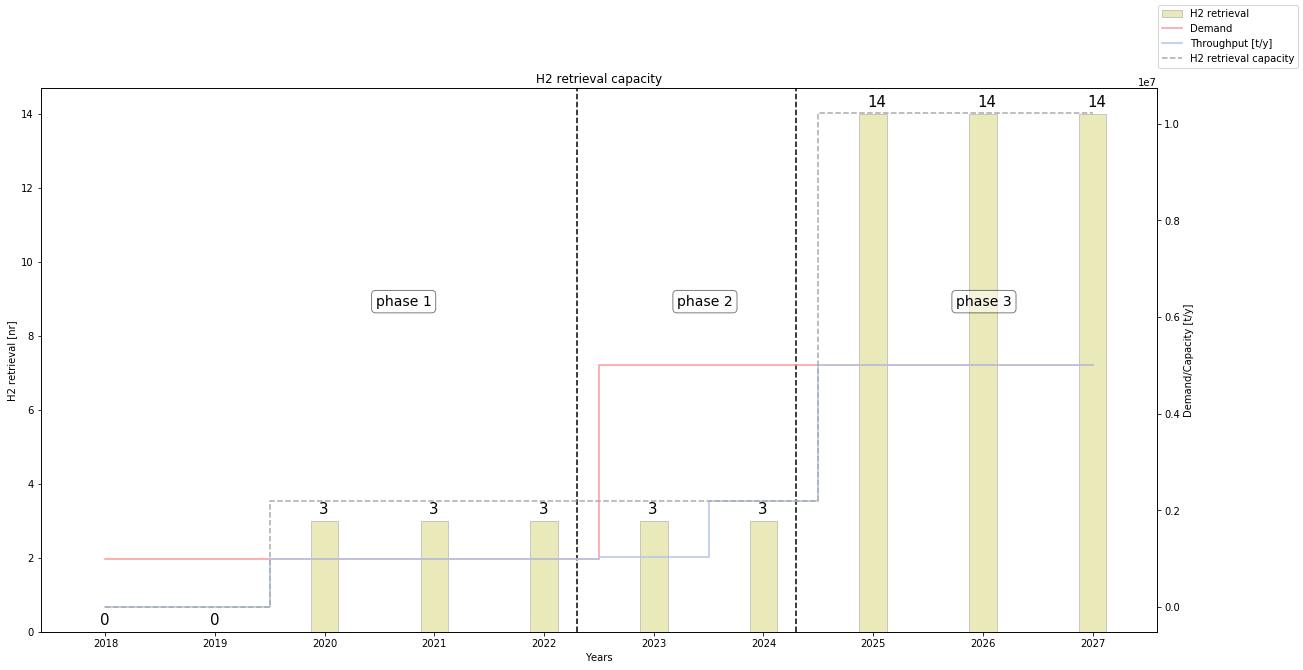

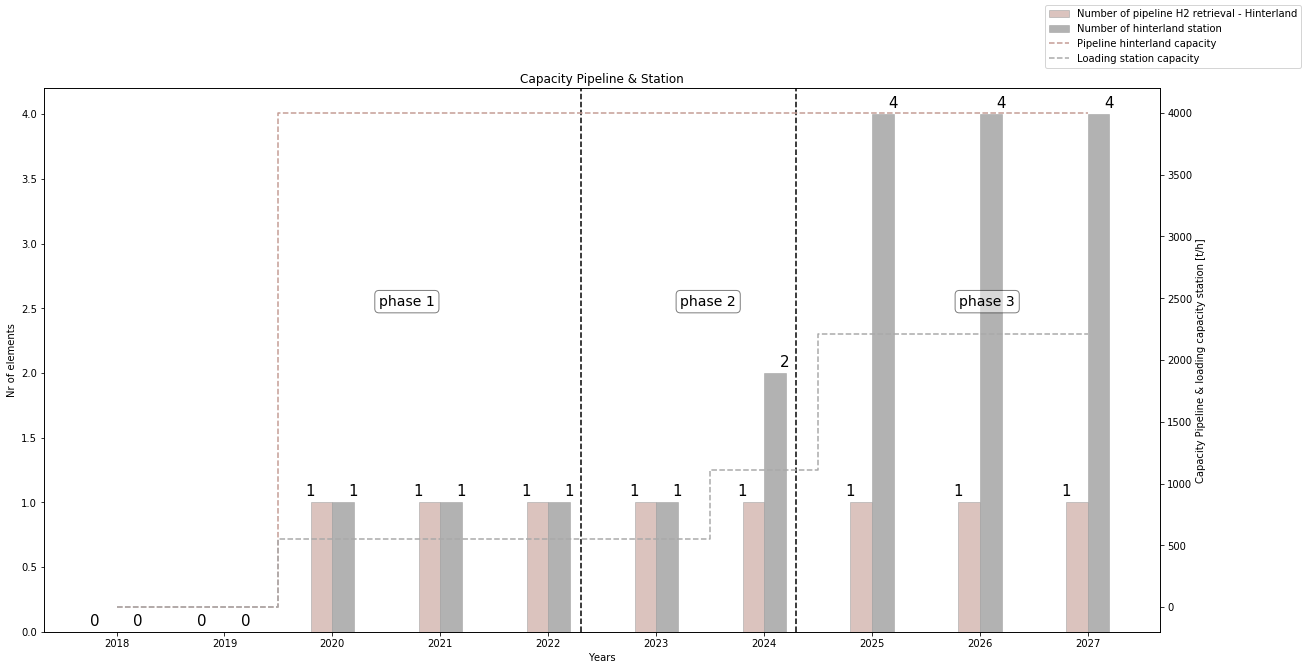

In [9]:
if True: 
    # to plot the terminal occupany's 
    Terminal.terminal_occupancy_plot() #occupancy of the berth 
    Terminal.plant_occupancy_plot() #occupancy of the plant
    Terminal.station_occupancy_plot() #occupancy of the loading station
    
    # to plot the capacities of the different elements 
    Terminal.Jetty_capacity_plot() #jetty
    Terminal.Pipeline1_capacity_plot() #pipeline from jetty to storage
    Terminal.Storage_capacity_plot() #storage
    Terminal.H2retrieval_capacity_plot() # H2 retrieval
    Terminal.Pipeline2_capacity_plot() #pipeline from H2 retrieval to hinterland        

In [10]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

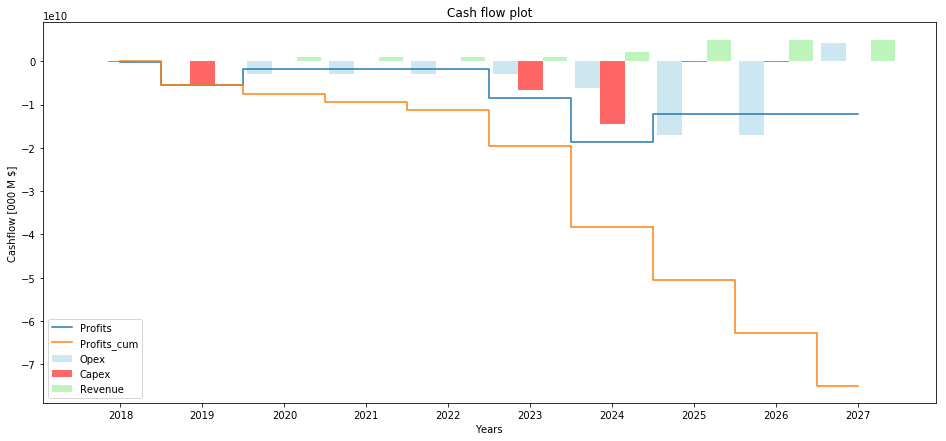

In [11]:
Terminal.cashflow_plot(cash_flows)

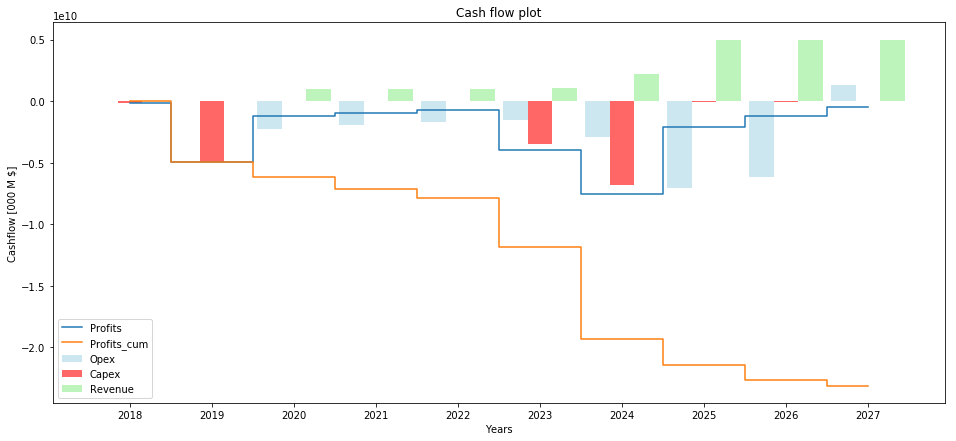

In [12]:
Terminal.cashflow_plot(cash_flows_WACC_real)

## SandBox

In [13]:
Terminal.NPV()

PV: [-1.29700800e+08 -4.93069902e+09 -1.22330926e+09 -9.57679076e+08
 -7.23785098e+08 -3.98504963e+09 -7.52178313e+09 -2.08088862e+09
 -1.22001575e+09  6.32892339e+09]
NPV: -16443986982.636042
